In [ ]:
import tensorflow as tf
tf.test.is_gpu_available()

Instructions for updating:
Use `tf.config.list_physical_devices('GPU')` instead.


False

In [ ]:
!nvidia-smi

NVIDIA-SMI has failed because it couldn't communicate with the NVIDIA driver. Make sure that the latest NVIDIA driver is installed and running.



In [ ]:
import keras
from keras.models import model_from_json
from keras.models import Sequential
from keras.layers import Dense, Dropout, Flatten
from keras.layers import Conv2D, MaxPooling2D
from keras.utils import to_categorical
from keras.preprocessing import image
import numpy as np
import pandas as pd
from keras.optimizers import SGD
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from tqdm import tqdm
from keras import optimizers
import nltk
import json
import ast
import numpy as np
from keras.models import Sequential
from keras.layers import Dense, Dropout, Activation, Flatten
from keras.layers import Convolution2D, MaxPooling2D
from keras.optimizers import SGD
from keras.callbacks import ModelCheckpoint
from sklearn.metrics import matthews_corrcoef
from sklearn.metrics import hamming_loss
import os
from sklearn.datasets import make_circles
from sklearn.metrics import accuracy_score
from sklearn.metrics import precision_score
from sklearn.metrics import recall_score
from sklearn.metrics import f1_score
from sklearn.metrics import cohen_kappa_score
from sklearn.metrics import roc_auc_score
from sklearn.metrics import confusion_matrix
from keras.layers.normalization import BatchNormalization
from collections import Counter

from PIL import ImageFile
ImageFile.LOAD_TRUNCATED_IMAGES = True

nltk.download('punkt')

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.


True

In [ ]:
train_img_path='/content/drive/MyDrive/Datasets/FYPROJECT/train/'
train_captions_path='/content/drive/MyDrive/Datasets/FYPROJECT/train_data.txt'
with open(train_captions_path, "r") as data:
    train_data = ast.literal_eval(data.read())

counter = Counter()
img_list=[]
path_list=[]
cap_list=[]
class_list=[]
unique_words=[]
dictall={}
id_list=[]
word_freq=Counter()

ids = train_data.keys()

for i, id in enumerate(ids):
    img_class=train_data[id][0]
    
    image_name=str(train_data[id][0]+'_'+train_data[id][1])
   
    complete_path=train_img_path+'instagram_dataset'+'/'+train_data[id][0]+'/'+train_data[id][1]

    caption=train_data[id][2]
    
    tokens = nltk.tokenize.word_tokenize(caption.lower())
    word_freq.update(tokens)
    if len(tokens)>=1:
        id_list.append(image_name) 
        path_list.append(complete_path)
        class_list.append(img_class)
        cap_part=caption.split()
        sub_cap=[]
        for cap in cap_part:

            sub_cap.append(str(cap))
            if cap not in unique_words:
                unique_words.append(cap)
        cap_list.append(sub_cap)
            
 
        
Data={'Id':id_list,
      'Path':path_list,
      'class':class_list,
      'Genre':cap_list
}

for word in unique_words:
    word_list=[]
    
    #print(word)
    for cap in cap_list:
        #print(cap)
        if word in cap:
            word_list.append(1)
            
        else:
            word_list.append(0)
    Data[word]=word_list
    #print(Data[word])
from pandas import DataFrame 
col=['Id','Path','class','Genre']
for word in unique_words:
    col.append(str(word))
train = DataFrame (Data, columns = col)






In [ ]:
pd.set_option('display.max_columns', None)
#pd.set_option('display.max_rows', None)


In [ ]:
train.tail()

,Id,Path,Genre,goodtimes,people,latepost,motivation,fit,fitnessaddict,funny,instagood,dinner,home,boy,chef,fitness,ab,workout,instamood,instalike,instadaily,sunnyday,leg,gay,instagay,throwback,boyfriend,love,mylove,tbt,throwbackthursday,likeforlike,followme,new,girl,selfie,hair,beauty,style,longhair,cool,piercing,organic,cousin,bored,like,random,fashion,summer,ootd,italy,snow,mountain,sky,skiing,school,yellow,good,food,foodporn,evening,you,best,kobe,nike,basketball,look,lady,model,top,awesome,flower,follow,running,protein,cleaneating,gym,fitfam,yummy,run,sister,family,truth,relationshipgoals,eye,tired,old,shoe,portrait,photography,fashionblog,jacket,menswear,fresh,coffee,nofilter,green,spring,igdaily,cake,happybirthday,red,muscle,man,depression,book,word,wedding,india,motd,mua,anastasiabeverlyhills,handmade,art,indonesia,face,nail,work,time,together,young,sibling,dad,instagram,van,adidas,dog,tumblr,island,amazing,healthy,holiday,travel,street,streetart,design,swag,tree,nature,training,sun,music,youtube,event,heart,beach,photo,blue,inspiration,paris,modeling,sea,dessert,lovely,beautiful,dream,hungry,homemade,yum,strawberry,icecream,tattoo,guy,smile,baby,lovehim,colorful,cutie,usa,painting,diy,drawing,hot,tuesday,gorgeous,camera,friend,woman,fun,babe,beer,university,monday,bride,surf,surfing,bikini,sport,black,white,blackandwhite,nikon,instafood,foodphotography,delicious,foodie,foodstagram,goodday,favorite,nyc,newyork,sweet,forever,selenagomez,song,pop,comedy,photooftheday,interior,retro,vintage,interiordesign,nomnom,hkig,foodlover,blogger,picoftheday,winter,saturday,pretty,birthday,melbourne,australia,photographer,vacation,pool,bestfriends,iloveyou,happy,cute,party,drunk,power,wonderful,eating,foodgasm,foodpics,foodblogger,lunch,hairstylist,blonde,squat,haircolor,haircut,vsco,vscocam,bluesky,naturelovers,night,out,funtimes,crazy,grass,brown,earth,handsome,cloud,fly,high,adventure,friday,foto,photoshoot,france,sleepy,car,morning,mylife,happyday,shot,gayboy,dogstagram,instadog,illustration,designer,dope,sketch,justinbieber,pink,goodmorning,health,goal,energy,success,haha,oldschool,russia,artist,lgbt,cat,cupcake,breakfast,hotel,zara,sol,sunset,ocean,vscophile,vscogram,studio,shooting,makeup,make,homedecor,decoration,instapic,trip,edit,london,peace,road,rain,iphoneonly,igers,photogrid,happiness,loveyou,polishgirl,curly,kiss,instamoment,park,sunday,dogsofinstagram,pet,doglover,fish,webstagram,bae,sunshine,simple,bomdia,myself,brunette,instaday,ilovemydog,dogoftheday,animal,potd,brother,with,nice,zaynmalik,bright,pencil,kawaii,hashtag,wood,instaart,leather,magic,accessory,picture,sleep,mac,bike,outdoors,view,epic,enjoy,explore,kid,depressed,purple,gift,korea,gopro,perfect,dusk,seaside,wine,denim,converse,hand,truelove,ready,for,day,walk,sand,miami,quoteoftheday,blueeyes,draw,color,lol,video,birthdaycake,puppy,collection,dress,lfl,onedirection,singer,vogue,kendalljenner,selca,daily,loveit,goodvibes,beard,sunny,pictureoftheday,bed,sexy,adorable,shop,germany,berlin,fashionista,maccosmetics,laugh,house,ink,kobebryant,mambaday,snapshot,body,pose,natural,babygirl,student,moda,besties,apple,kitchen,weekend,streetfashion,instafashion,lookoftheday,streetstyle,photograph,bali,instabeauty,instaphoto,pizza,yolo,eatclean,tulip,wow,sneaker,life,team,inlove,catsofinstagram,friendship,fridaynight,saturdaynight,april,nightlife,always,colour,eyeliner,nailart,makeupartist,omg,greeneye,vega,couple,polishboy,thebest,landscape,chocolate,and,instahappy,instagirl,relax,chilling,building,bestoftheday,sunrise,city,pic,drink,redlips,brasil,queen,light,justdoit,metal,band,fire,california,blog,follower,comment,norway,lifestyle,film,bnw,bird,lake,instastyle,fashionblogger,fashiongram,hairstyle,homesweethome,plant,peaceful,eyebrow,babyboy,instaboy,missyou,instagramers,graffiti,chanel,brand,bag,jewelry,paint,history,weather,believe,jesus,god,wisdom,king,romantic,garden,memory,gymlife,hardwork,instafit,instafollow,instacool,instachile,autumn,outfit,iphonesia,repost,

In [ ]:
train_image = []
for i in tqdm(range(train.shape[0])):
    img = image.load_img(train['Path'][i],target_size=(227,227,3))
    img = image.img_to_array(img)
    img = img/255
    train_image.append(img)
X_train = np.array(train_image)
    
y_train = np.array(train.drop(['Id', 'Path','Genre'],axis=1))

100%|██████████| 4000/4000 [38:15<00:00,  1.74it/s]


In [ ]:
test_captions_path='/content/drive/MyDrive/Datasets/FYPROJECT/vald_data.txt'
test_img_path='/content/drive/MyDrive/Datasets/FYPROJECT/vald/'
with open(test_captions_path, "r") as data:
    test_data = ast.literal_eval(data.read())

counter = Counter()
img_list=[]
path_list=[]
cap_list=[]

dictall={}
id_list=[]

ids = test_data.keys()

for i, id in enumerate(ids):
    
    image_name=str(test_data[id][0]+'_'+test_data[id][1])
   
    complete_path=test_img_path+'instagram_dataset'+'/'+test_data[id][0]+'/'+test_data[id][1]
   
    caption=test_data[id][2]
    tokens = nltk.tokenize.word_tokenize(caption.lower())
    word_freq.update(tokens)
    if len(tokens)>=1:
        id_list.append(image_name) 
        path_list.append(complete_path)
        cap_part=caption.split()
        sub_cap=[]
        for cap in cap_part:

            sub_cap.append(str(cap))
            #if cap not in unique_words:
                #unique_words.append(cap)
        cap_list.append(sub_cap)
    
  
    
valData={'Id':id_list,
      'Path':path_list,
      'Genre':cap_list
         
    
}
for word in unique_words:
    word_list=[]
    
    #print(word)
    for cap in cap_list:
        #print(cap)
        if word in cap:
            word_list.append(1)
            
        else:
            word_list.append(0)
    valData[word]=word_list
    #print(valData[word])
from pandas import DataFrame 
col=['Id','Path','Genre']
for word in unique_words:
    col.append(str(word))
test= DataFrame (valData, columns = col)
        
    
    


In [ ]:
test.head()

,Id,Path,Genre,goodtimes,people,latepost,motivation,fit,fitnessaddict,funny,instagood,dinner,home,boy,chef,fitness,ab,workout,instamood,instalike,instadaily,sunnyday,leg,gay,instagay,throwback,boyfriend,love,mylove,tbt,throwbackthursday,likeforlike,followme,new,girl,selfie,hair,beauty,style,longhair,cool,piercing,organic,cousin,bored,like,random,fashion,summer,ootd,italy,snow,mountain,sky,skiing,school,yellow,good,food,foodporn,evening,you,best,kobe,nike,basketball,look,lady,model,top,awesome,flower,follow,running,protein,cleaneating,gym,fitfam,yummy,run,sister,family,truth,relationshipgoals,eye,tired,old,shoe,portrait,photography,fashionblog,jacket,menswear,fresh,coffee,nofilter,green,spring,igdaily,cake,happybirthday,red,muscle,man,depression,book,word,wedding,india,motd,mua,anastasiabeverlyhills,handmade,art,indonesia,face,nail,work,time,together,young,sibling,dad,instagram,van,adidas,dog,tumblr,island,amazing,healthy,holiday,travel,street,streetart,design,swag,tree,nature,training,sun,music,youtube,event,heart,beach,photo,blue,inspiration,paris,modeling,sea,dessert,lovely,beautiful,dream,hungry,homemade,yum,strawberry,icecream,tattoo,guy,smile,baby,lovehim,colorful,cutie,usa,painting,diy,drawing,hot,tuesday,gorgeous,camera,friend,woman,fun,babe,beer,university,monday,bride,surf,surfing,bikini,sport,black,white,blackandwhite,nikon,instafood,foodphotography,delicious,foodie,foodstagram,goodday,favorite,nyc,newyork,sweet,forever,selenagomez,song,pop,comedy,photooftheday,interior,retro,vintage,interiordesign,nomnom,hkig,foodlover,blogger,picoftheday,winter,saturday,pretty,birthday,melbourne,australia,photographer,vacation,pool,bestfriends,iloveyou,happy,cute,party,drunk,power,wonderful,eating,foodgasm,foodpics,foodblogger,lunch,hairstylist,blonde,squat,haircolor,haircut,vsco,vscocam,bluesky,naturelovers,night,out,funtimes,crazy,grass,brown,earth,handsome,cloud,fly,high,adventure,friday,foto,photoshoot,france,sleepy,car,morning,mylife,happyday,shot,gayboy,dogstagram,instadog,illustration,designer,dope,sketch,justinbieber,pink,goodmorning,health,goal,energy,success,haha,oldschool,russia,artist,lgbt,cat,cupcake,breakfast,hotel,zara,sol,sunset,ocean,vscophile,vscogram,studio,shooting,makeup,make,homedecor,decoration,instapic,trip,edit,london,peace,road,rain,iphoneonly,igers,photogrid,happiness,loveyou,polishgirl,curly,kiss,instamoment,park,sunday,dogsofinstagram,pet,doglover,fish,webstagram,bae,sunshine,simple,bomdia,myself,brunette,instaday,ilovemydog,dogoftheday,animal,potd,brother,with,nice,zaynmalik,bright,pencil,kawaii,hashtag,wood,instaart,leather,magic,accessory,picture,sleep,mac,bike,outdoors,view,epic,enjoy,explore,kid,depressed,purple,gift,korea,gopro,perfect,dusk,seaside,wine,denim,converse,hand,truelove,ready,for,day,walk,sand,miami,quoteoftheday,blueeyes,draw,color,lol,video,birthdaycake,puppy,collection,dress,lfl,onedirection,singer,vogue,kendalljenner,selca,daily,loveit,goodvibes,beard,sunny,pictureoftheday,bed,sexy,adorable,shop,germany,berlin,fashionista,maccosmetics,laugh,house,ink,kobebryant,mambaday,snapshot,body,pose,natural,babygirl,student,moda,besties,apple,kitchen,weekend,streetfashion,instafashion,lookoftheday,streetstyle,photograph,bali,instabeauty,instaphoto,pizza,yolo,eatclean,tulip,wow,sneaker,life,team,inlove,catsofinstagram,friendship,fridaynight,saturdaynight,april,nightlife,always,colour,eyeliner,nailart,makeupartist,omg,greeneye,vega,couple,polishboy,thebest,landscape,chocolate,and,instahappy,instagirl,relax,chilling,building,bestoftheday,sunrise,city,pic,drink,redlips,brasil,queen,light,justdoit,metal,band,fire,california,blog,follower,comment,norway,lifestyle,film,bnw,bird,lake,instastyle,fashionblogger,fashiongram,hairstyle,homesweethome,plant,peaceful,eyebrow,babyboy,instaboy,missyou,instagramers,graffiti,chanel,brand,bag,jewelry,paint,history,weather,believe,jesus,god,wisdom,king,romantic,garden,memory,gymlife,hardwork,instafit,instafollow,instacool,instachile,autumn,outfit,iphonesia,repost,

In [ ]:
test_image = []
for i in tqdm(range(test.shape[0])):
    img = image.load_img(test['Path'][i],target_size=(227,227,3))
    img = image.img_to_array(img)
    img = img/255
    test_image.append(img)
X_test = np.array(test_image)
    
y_test = np.array(test.drop(['Id','Path', 'Genre'],axis=1))

100%|██████████| 500/500 [04:37<00:00,  1.80it/s]


In [ ]:
model = Sequential()

# 1st Convolutional Layer
model.add(Conv2D(filters=96, input_shape=(227,227,3), kernel_size=(11,11), strides=(4,4), padding='valid'))
model.add(Activation('relu'))
# Pooling 
model.add(MaxPooling2D(pool_size=(2,2), strides=(2,2), padding='valid'))
# Batch Normalisation before passing it to the next layer
model.add(BatchNormalization())

# 2nd Convolutional Layer
model.add(Conv2D(filters=256, kernel_size=(11,11), strides=(1,1), padding='valid'))
model.add(Activation('relu'))
# Pooling
model.add(MaxPooling2D(pool_size=(2,2), strides=(2,2), padding='valid'))
# Batch Normalisation
model.add(BatchNormalization())

# 3rd Convolutional Layer
model.add(Conv2D(filters=384, kernel_size=(3,3), strides=(1,1), padding='valid'))
model.add(Activation('relu'))
# Batch Normalisation
model.add(BatchNormalization())

# 4th Convolutional Layer
model.add(Conv2D(filters=384, kernel_size=(3,3), strides=(1,1), padding='valid'))
model.add(Activation('relu'))
# Batch Normalisation
model.add(BatchNormalization())

# 5th Convolutional Layer
model.add(Conv2D(filters=256, kernel_size=(3,3), strides=(1,1), padding='valid'))
model.add(Activation('relu'))
# Pooling
model.add(MaxPooling2D(pool_size=(2,2), strides=(2,2), padding='valid'))
# Batch Normalisation
model.add(BatchNormalization())

# Passing it to a dense layer
model.add(Flatten())
# 1st Dense Layer
model.add(Dense(4096, input_shape=(100*100*3,)))
model.add(Activation('relu'))
# Add Dropout to prevent overfitting
model.add(Dropout(0.4))
# Batch Normalisation
model.add(BatchNormalization())

# 2nd Dense Layer
model.add(Dense(4096))
model.add(Activation('relu'))
# Add Dropout
model.add(Dropout(0.4))
# Batch Normalisation
model.add(BatchNormalization())

# 3rd Dense Layer
model.add(Dense(1000))
model.add(Activation('relu'))
# Add Dropout
model.add(Dropout(0.4))
# Batch Normalisation
model.add(BatchNormalization())

# Output Layer
model.add(Dense(977))
model.add(Activation('softmax')) 
  
  
sgd = SGD(lr=0.1, decay=1e-6, momentum=0.9, nesterov=True)
model.compile(loss='binary_crossentropy', optimizer=sgd, metrics=['accuracy'])

model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 55, 55, 96)        34944     
_________________________________________________________________
activation (Activation)      (None, 55, 55, 96)        0         
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 27, 27, 96)        0         
_________________________________________________________________
batch_normalization (BatchNo (None, 27, 27, 96)        384       
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 17, 17, 256)       2973952   
_________________________________________________________________
activation_1 (Activation)    (None, 17, 17, 256)       0         
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 8, 8, 256)         0

In [ ]:
history_dict = history.history
history_dict.keys()

NameError: ignored

In [ ]:
history=model.fit(X_train, y_train, epochs=400, validation_data=(X_test, y_test), batch_size=1024)

train_loss=history.history['loss']
val_loss=history.history['val_loss']
train_acc=history.history['accuracy']
val_acc=history.history['val_accuracy']

numpy_loss_train = np.array(train_loss)
np.savetxt('/content/drive/MyDrive/Datasets/FYPROJECT/mlc/train_loss_history_1.txt', numpy_loss_train, delimiter=",")


numpy_loss_val = np.array(val_loss)
np.savetxt('/content/drive/MyDrive/Datasets/FYPROJECT/mlc/val_loss_history_1.txt', numpy_loss_val, delimiter=",")

numpy_acc_train = np.array(train_acc)
np.savetxt('/content/drive/MyDrive/Datasets/FYPROJECT/mlc/train_acc_history_1.txt', numpy_acc_train, delimiter=",")

numpy_acc_val = np.array(val_acc)
np.savetxt('/content/drive/MyDrive/Datasets/FYPROJECT/mlc/val_acc_history_1.txt', numpy_acc_val, delimiter=",")
   

# serialize model to JSON
model_json = model.to_json()
with open("/content/drive/MyDrive/Datasets/FYPROJECT/mlc/alex_model_1.json", "w") as json_file:
    json_file.write(model_json)
# serialize weights to HDF5


model.save_weights('/content/drive/MyDrive/Datasets/FYPROJECT/mlc/alex_model_1.h5')
print("Saved model to disk")

Epoch 1/400
4/4 [==============================] - 3s 542ms/step - loss: 0.4801 - accuracy: 0.0015 - val_loss: 0.4493 - val_accuracy: 0.0100
Epoch 2/400
4/4 [==============================] - 2s 596ms/step - loss: 0.4639 - accuracy: 0.0018 - val_loss: 0.4335 - val_accuracy: 0.0100
Epoch 3/400
4/4 [==============================] - 2s 531ms/step - loss: 0.4460 - accuracy: 0.0020 - val_loss: 0.4171 - val_accuracy: 0.0100
Epoch 4/400
4/4 [==============================] - 2s 564ms/step - loss: 0.4292 - accuracy: 0.0027 - val_loss: 0.4005 - val_accuracy: 0.0100
Epoch 5/400
4/4 [==============================] - 2s 579ms/step - loss: 0.4115 - accuracy: 0.0012 - val_loss: 0.3836 - val_accuracy: 0.0100
Epoch 6/400
4/4 [==============================] - 2s 599ms/step - loss: 0.3931 - accuracy: 0.0010 - val_loss: 0.3666 - val_accuracy: 0.0040
Epoch 7/400
4/4 [==============================] - 2s 601ms/step - loss: 0.3755 - accuracy: 0.0015 - val_loss: 0.3495 - val_accuracy: 0.0000e+00
Epoch 8/4

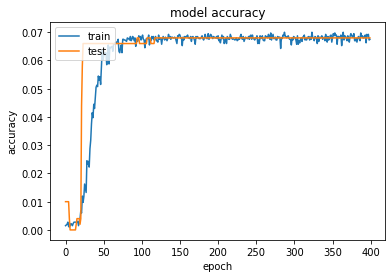

In [ ]:
# summarize history for accuracy
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

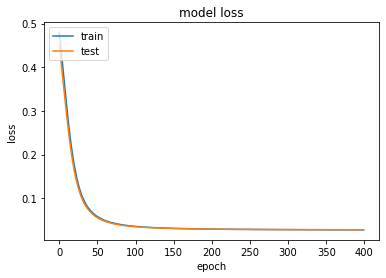

In [ ]:
# summarize history for loss
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

In [ ]:
json_file = open('/content/drive/MyDrive/Datasets/FYPROJECT/mlc/alex_model_1.json', 'r')
loaded_model_json = json_file.read()
json_file.close()
loaded_model = model_from_json(loaded_model_json)
# load weights into new model
loaded_model.load_weights("/content/drive/MyDrive/Datasets/FYPROJECT/mlc/alex_model_1.h5")
print("Loaded model from disk")
 
# evaluate loaded model on test data
#sgd = SGD(lr=0.1, decay=1e-6, momentum=0.9, nesterov=True)
#loaded_model.compile(loss='binary_crossentropy', optimizer=sgd, metrics=['accuracy'])
#score = loaded_model.evaluate(X, Y, verbose=0)

Loaded model from disk


In [ ]:
loaded_model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 55, 55, 96)        34944     
_________________________________________________________________
activation (Activation)      (None, 55, 55, 96)        0         
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 27, 27, 96)        0         
_________________________________________________________________
batch_normalization (BatchNo (None, 27, 27, 96)        384       
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 17, 17, 256)       2973952   
_________________________________________________________________
activation_1 (Activation)    (None, 17, 17, 256)       0         
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 8, 8, 256)         0

In [ ]:
test_captions_path='/content/drive/MyDrive/Datasets/FYPROJECT/test_data.txt'
test_img_path='/content/drive/MyDrive/Datasets/FYPROJECT/test/'
with open(test_captions_path, "r") as data:
    test_data = ast.literal_eval(data.read())
counter = Counter()
all_test_img_paths=[]
all_test_captions=[]
ids = test_data.keys()
save_in_file = open('/content/drive/MyDrive/Datasets/FYPROJECT/mlc/alex_testresult_1.txt', "w")
total_f1=0
for i, id in enumerate(ids):
    pred=[]
    image_name=test_data[id][1]
    print("\nimage name : {}".format(test_data[id][1]))
    complete_path=test_img_path+'instagram_dataset'+'/'+test_data[id][0]+'/'+test_data[id][1]
    print("\nimage path : {}".format(complete_path))
    #caption='<start> '+test_data[id][2]+' <end>'
    caption=test_data[id][2]
    img = image.load_img(complete_path,target_size=(227,227,3))
    img = image.img_to_array(img)
    img = img/255
    classes = np.array(train.columns[2:])
    #proba = model.predict(img.reshape(1,227,227,3))
    proba = loaded_model.predict(img.reshape(1,227,227,3))
    top_3 = np.argsort(proba[0])[:-4:-1]
    for i in range(3):
        print("{}".format(classes[top_3[i]])+" ({:.3})".format(proba[0][top_3[i]]))
        pred.append(str(classes[top_3[i]]))
    save_in_file.write(complete_path)
    save_in_file.write(';')
    #text='original caption : '+str(caption)
    act=caption.split()
    res = len([key for key, val in enumerate(act) if val in set(pred)])
    precision=res/len(pred)
    recall=res/len(act)
    if(precision==0):
      f1=0
    elif(recall==0):
      f1=0
    else:
      f1=2*precision*recall/precision+recall
    total_f1=total_f1+f1
    print(f1)
    text=str(caption.split())
    save_in_file.write(text)
    save_in_file.write(';')
    #text='predicted caption : '+str(pred)
    text=str(pred)
    save_in_file.write(text)
    save_in_file.write('\n')
    
total_f1=total_f1/500
print(total_f1)            
save_in_file.close()


image name : image_1918.jpg

image path : /content/drive/MyDrive/Datasets/FYPROJECT/test/instagram_dataset/friday/image_1918.jpg
boyfriend (0.0215)
new (0.0108)
random (0.0102)
0

image name : image_1073.jpg

image path : /content/drive/MyDrive/Datasets/FYPROJECT/test/instagram_dataset/nike/image_1073.jpg
boyfriend (0.0197)
new (0.0108)
random (0.0099)
0

image name : image_723.jpg

image path : /content/drive/MyDrive/Datasets/FYPROJECT/test/instagram_dataset/hair/image_723.jpg
boyfriend (0.0181)
new (0.0115)
random (0.0108)
0

image name : image_484.jpg

image path : /content/drive/MyDrive/Datasets/FYPROJECT/test/instagram_dataset/instafood/image_484.jpg
boyfriend (0.0185)
random (0.0106)
new (0.0106)
0

image name : image_1623.jpg

image path : /content/drive/MyDrive/Datasets/FYPROJECT/test/instagram_dataset/yum/image_1623.jpg
boyfriend (0.022)
new (0.011)
random (0.0105)
0

image name : image_995.jpg

image path : /content/drive/MyDrive/Datasets/FYPROJECT/test/instagram_dataset/col